![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Non-parametric Regression </center>
### <center> Regression Tree </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/12_NonparametricRegression/MainRegressionTree.ipynb)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

### Make some data:

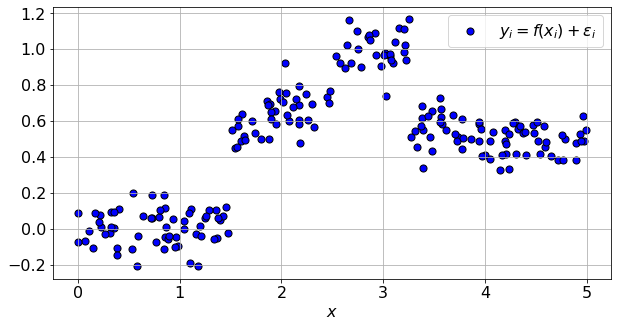

In [2]:
def f(vX):
    vY            = 1/2 + 0*vX
    vY[vX < 3.25] = 1;
    vY[vX < 2.5]  = .5 + vX[vX < 2.5] / 5 - .25;
    vY[vX < 1.5]  = 0;
    
    return vY
    
N  = 201
vX = 5 * np.random.rand(N)
vY = f(vX) + np.random.randn(N) / 10

plt.figure(figsize=(10, 5))
plt.scatter(vX, vY, s=50, c='b', edgecolor='k', label='$y_i = f(x_i) + \epsilon_i$')
plt.grid()
plt.xlabel('$x$')
plt.legend()
plt.show()

In [5]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

x = np.linspace(0, 5, 1001)

def PlotTree(split):
    oTree    = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=split+1, random_state=0)
    oTree    = oTree.fit(vX[:,None], vY)
    
    y     = oTree.predict(x[:,None])
    _, ax = plt.subplots(1, 2, figsize=(20,10))
    
    ax[0].scatter(vX, vY, s=50, c='b', edgecolor='k', label='$y_i = f(x_i) + \epsilon_i$')
    ax[0].plot   (x,  y,       'r',    lw=3,          label='regression tree')
    ax[0].grid()
    ax[0].set_xlabel('$x$')
    ax[0].legend()

    plot_tree(oTree, filled=True, ax=ax[1], rounded=True)
    ax[1].set_title(f'Max splits = {split}')
    

In [6]:
from ipywidgets import interact, IntSlider, Layout

splitSlider = IntSlider(min=1, max=20, step=1, value=1, layout=Layout(width='80%'))
interact(PlotTree, split=splitSlider)
plt.show()

interactive(children=(IntSlider(value=1, description='split', layout=Layout(width='80%'), max=20, min=1), Outp…